### 선형회귀란?

두 변수 간의 관계를 직선으로 나타내는 통계 기법입니다. 하나의 **독립변수(X)**로 **종속변수(Y)**를 예측합니다.

**수식**: `y = β₀ + β₁x + ε`

- β₀: 절편 (y-intercept)
- β₁: 기울기 (slope)
- ε: 오차항

### 핵심 개념

1. **최소제곱법(OLS)**: 실제값과 예측값의 차이(오차)의 제곱합을 최소화
2. **결정계수(R²)**: 모델이 데이터를 얼마나 잘 설명하는지 (0~1, 높을수록 좋음)
3. **잔차(Residual)**: 실제값 - 예측값

### 예시

- 공부 시간 → 시험 점수
- 광고비 → 매출액
- 키 → 몸무게

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [19]:
# 1. 데이터 생성 (공부 시간 vs 시험 점수)
np.random.seed(42)
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
test_scores = 50 + 5 * study_hours + np.random.normal(0, 3, 10)

# DataFrame으로 변환
df = pd.DataFrame({
    '공부시간': study_hours,
    '시험점수': test_scores
})
print("데이터:")
print(df)
print()

데이터:
   공부시간        시험점수
0     1   56.490142
1     2   59.585207
2     3   66.943066
3     4   74.569090
4     5   74.297540
5     6   79.297589
6     7   89.737638
7     8   92.302304
8     9   93.591577
9    10  101.627680



In [20]:
# 2. 모델 학습
X = study_hours.reshape(-1, 1)  # 2차원 배열로 변환
y = test_scores

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
# 3. 예측
y_pred = model.predict(X)

In [22]:
# 4. 결과 출력
print(f"절편 (β₀): {model.intercept_:.2f}")
print(f"기울기 (β₁): {model.coef_[0]:.2f}")
print(f"R² 점수: {r2_score(y, y_pred):.4f}")
print(f"평균제곱오차(MSE): {mean_squared_error(y, y_pred):.2f}")
print()

절편 (β₀): 51.46
기울기 (β₁): 4.98
R² 점수: 0.9797
평균제곱오차(MSE): 4.23



In [23]:
# 5. 새로운 데이터 예측
new_hours = np.array([[5.5]])
predicted_score = model.predict(new_hours)
print(f"공부 시간 5.5시간일 때 예상 점수: {predicted_score[0]:.2f}점")

공부 시간 5.5시간일 때 예상 점수: 78.84점


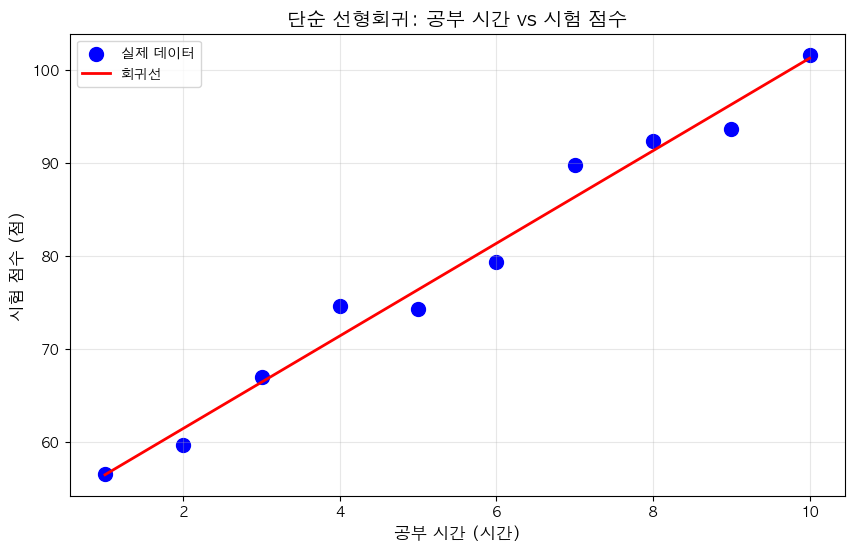

In [24]:
# 6. 시각화
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, test_scores, color='blue', label='실제 데이터', s=100)
plt.plot(study_hours, y_pred, color='red', linewidth=2, label='회귀선')
plt.xlabel('공부 시간 (시간)', fontsize=12)
plt.ylabel('시험 점수 (점)', fontsize=12)
plt.title('단순 선형회귀: 공부 시간 vs 시험 점수', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 결과 해석

1. **기울기(β₁)**: 공부 시간이 1시간 증가하면 점수가 약 5점 증가
2. **절편(β₀)**: 공부 시간이 0일 때 기본 점수
3. **R²**: 1에 가까우면 모델이 데이터를 잘 설명함
4. **MSE**: 예측 오차의 평균, 작을수록 좋음

## 연습 문제

1. 키(X)와 몸무게(Y) 데이터로 선형회귀 모델을 만들어보세요
2. 광고비(X)와 판매량(Y)의 관계를 분석해보세요
3. R² 값이 낮다면 어떤 의미일까요?

In [30]:
# 1. 데이터 생성 (키, 몸무게)
np.random.seed(42)
heights = np.random.normal(170, 10, size=100)
weights = heights + np.random.normal(0, 3, 100) - 100

# DataFrame으로 변환
df = pd.DataFrame({
    '키': heights,
    '몸무게': weights
})
print("데이터:")
print(df)
print()

# 2. 모델 학습
X = heights.reshape(-1, 1)  # 2차원 배열로 변환
y = weights

model = LinearRegression()
model.fit(X, y)

# 3. 예측
y_pred = model.predict(X)

# 4. 결과 출력
print(f"절편 (β₀): {model.intercept_:.2f}")
print(f"기울기 (β₁): {model.coef_[0]:.2f}")
print(f"R² 점수: {r2_score(y, y_pred):.4f}")
print(f"평균제곱오차(MSE): {mean_squared_error(y, y_pred):.2f}")
print()

# 5. 새로운 데이터 예측
new_height = np.array([[181]])
predicted_height = model.predict(new_height)
print(f"키 181일 때 예상 몸무게: {predicted_height[0]:.2f}kg")

데이터:
             키        몸무게
0   174.967142  70.721029
1   168.617357  67.355421
2   176.476885  75.448742
3   185.230299  82.823467
4   167.658466  67.174609
..         ...        ...
95  155.364851  56.520803
96  172.961203  70.309630
97  172.610553  73.071728
98  170.051135  70.225761
99  167.654129  64.225218

[100 rows x 2 columns]

절편 (β₀): -92.67
기울기 (β₁): 0.96
R² 점수: 0.9039
평균제곱오차(MSE): 7.95

키 181일 때 예상 몸무게: 80.55kg
